In [40]:
import numpy as np

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [44]:
# set the location and size of the atlas rectangle
xvalues = np.linspace(-0.22, -0.21, 1000)
yvalues = np.linspace(-0.70, -0.69, 1000)

In [45]:
# size of these lists of x and y values
xlen = len(xvalues)
ylen = len(yvalues)

In [46]:
def mandel(c, maxiter):
    # starting value of complex z is 0+0i before iterations update it
    z = complex(0,0)
    # start iterating and stop when it's done maxiter times
    for iteration in range(maxiter):
        # the main function which generates the output value of z
        #from the input values using the formula (z^2) + c
        z = (z*z) + c
        # check if the (pythagorean) magnitude of the output complex
        #number z is bigger than 4, and if so stop iterating as we've diverged
        #already
        if abs(z) > 4:
            break
            pass
        pass
    # return the number of iter
    return iteration

In [47]:
atlas = np.empty((xlen,ylen))

In [48]:
for ix in range(xlen):
    for iy in range(ylen):
        
        cx = xvalues[ix]
        cy = yvalues[iy]
        c = np.complex(cx,cy)
        
        atlas[ix,iy] = mandel(c,1000)
        
        pass
    pass

In [49]:
plt.figure(figsize=(100,1000))

<Figure size 7200x72000 with 0 Axes>

<Figure size 7200x72000 with 0 Axes>

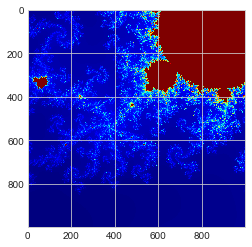

In [50]:
plt.imshow(atlas.T, interpolation="nearest",cmap="jet")

In [52]:
figure = plt.figure()
figure.savefig('boo.png')

<Figure size 432x288 with 0 Axes>

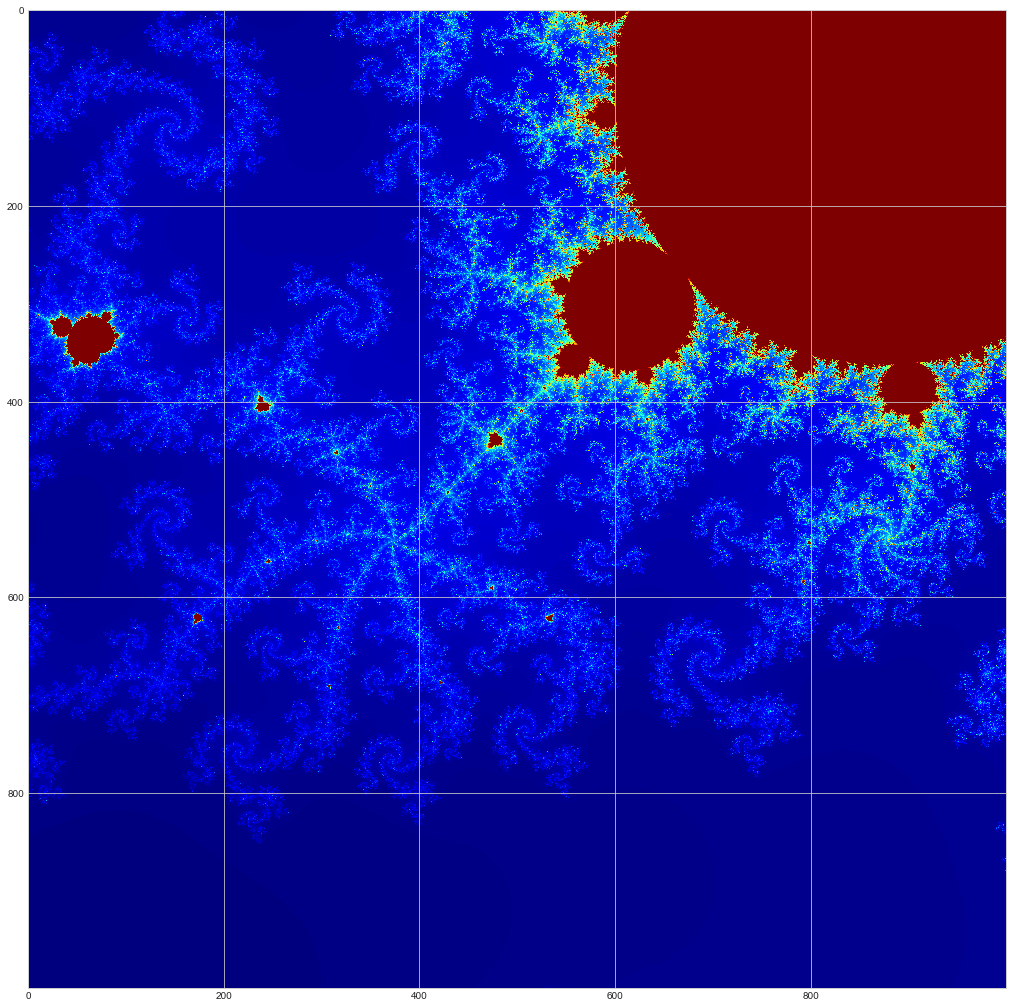

In [54]:

# In[40]:


import numpy as np


# In[41]:


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


# In[44]:


# set the location and size of the atlas rectangle
xvalues = np.linspace(-0.22, -0.21, 1000)
yvalues = np.linspace(-0.70, -0.69, 1000)


# In[45]:


# size of these lists of x and y values
xlen = len(xvalues)
ylen = len(yvalues)


# In[46]:


def mandel(c, maxiter):
    # starting value of complex z is 0+0i before iterations update it
    z = complex(0,0)
    # start iterating and stop when it's done maxiter times
    for iteration in range(maxiter):
       
        z = (z*z) + c
       
        if abs(z) > 4:
            break
            pass
        pass
    # return the number of iter
    return iteration


# In[47]:


atlas = np.empty((xlen,ylen))


# In[48]:


for ix in range(xlen):
    for iy in range(ylen):
        
        cx = xvalues[ix]
        cy = yvalues[iy]
        c = np.complex(cx,cy)
        
        atlas[ix,iy] = mandel(c,1000)
        
        pass
    pass


# In[49]:


plt.figure(figsize=(18,18))


# In[50]:


plt.imshow(atlas.T, interpolation="nearest",cmap="jet")






In [57]:
fig = plt.figure()
plt.axis('off')
fig.savefig('bar.png')
plt.close()

In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from math import sqrt

sin60 = sqrt(3)/2

xdata = [0, 0.5, 1, 0]
ydata = [0, sin60, 0, 0]

def break_line(pos, xdata, ydata):
    """
    Breaks a line and form the next spike in a Koch iteration
    the line is represented by its ends x/ydata[pos,pos+1]
    """
    x0 = xdata[pos]
    x1 = xdata[pos+1]
    y0 = ydata[pos]
    y1 = ydata[pos+1]
    xvec = x1 - x0
    yvec = y1 - y0

    xdata.insert(pos+1, x0 + xvec/3)
    ydata.insert(pos+1, y0 + yvec/3)

    xdata.insert(pos+2, x0 + xvec/2 - yvec*sin60/3)
    ydata.insert(pos+2, y0 + xvec*sin60/3 + yvec/2)

    xdata.insert(pos+3, x0 + 2*xvec/3)
    ydata.insert(pos+3, y0 + 2*yvec/3)


def koch_iteration(xdata, ydata):
    """
    Breaks the (n-1) lines in a xdata of length n by calling break_line()
    """
    pos = 0
    while pos < len(xdata) - 1:
        break_line(pos, xdata, ydata)
        pos += 4

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
ax.axes.set_xlim(-0.5,1.5)
ax.axes.set_ylim(-1, 1)
fig.tight_layout()
plt.savefig("frame_0.png", dpi = 500, format="png")
for i in range(1,99):
    koch_iteration(xdata, ydata)
    ax.plot(xdata, ydata)
plt.show()
